<a href="https://colab.research.google.com/github/Jonkunl/Product-Review/blob/master/Copy_of_Semantic_Similarity_with_TF_Hub_Universal_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/hub/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/s?q=google%2Funiversal-sentence-encoder%2F4%20OR%20google%2Funiversal-sentence-encoder-large%2F5"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


## Setup

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [2]:
%%capture
!pip3 install seaborn

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/My Drive/clean.csv')

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [7]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [13]:
import pandas as pd 
df=pd.read_csv('/content/drive/My Drive/abstract.csv')

In [ ]:
#@title Compute a representation for each message, showing various lengths supported.
messages = df['abstract'].to_list()

In [ ]:
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)
convert_emb = []

for i, message_embedding in enumerate(np.array(convert_emb[:5]).tolist()):
  print(message_embedding)

In [ ]:
accounting = df[df['classification'] == 'Accounting']
accounting_abstract = accounting['abstract'].to_list()

In [ ]:
Con = df[df['classification'] == 'Construction']
Con_abstract = Con['abstract'].to_list()

In [ ]:
HM = df[df['classification'] == 'Healthcare & Medical']
HM_abstract = HM['abstract'].to_list()

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [5]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

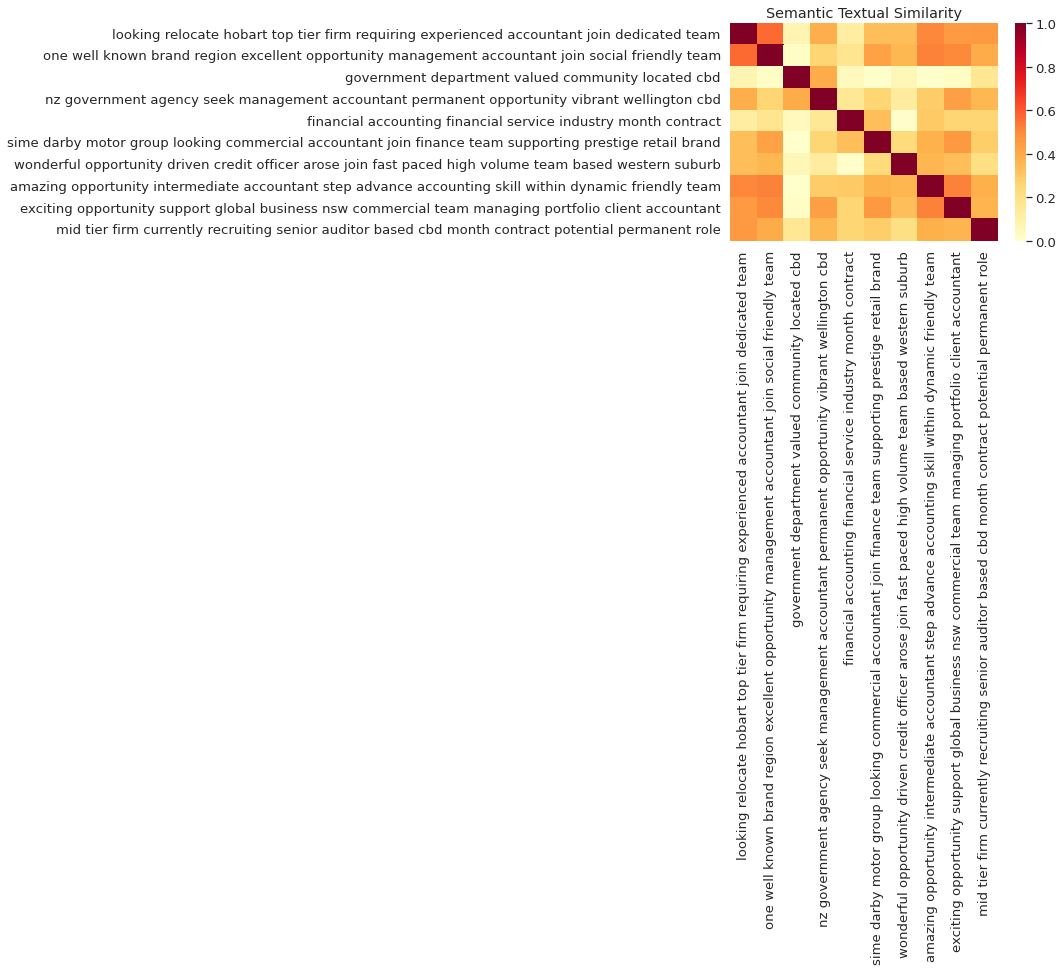

In [ ]:

run_and_plot(accounting_abstract[10:20])
               

In [ ]:
BFS = df[df['classification'] == 'Real Estate & Property']
BFS_abstract = BFS['abstract'].to_list()

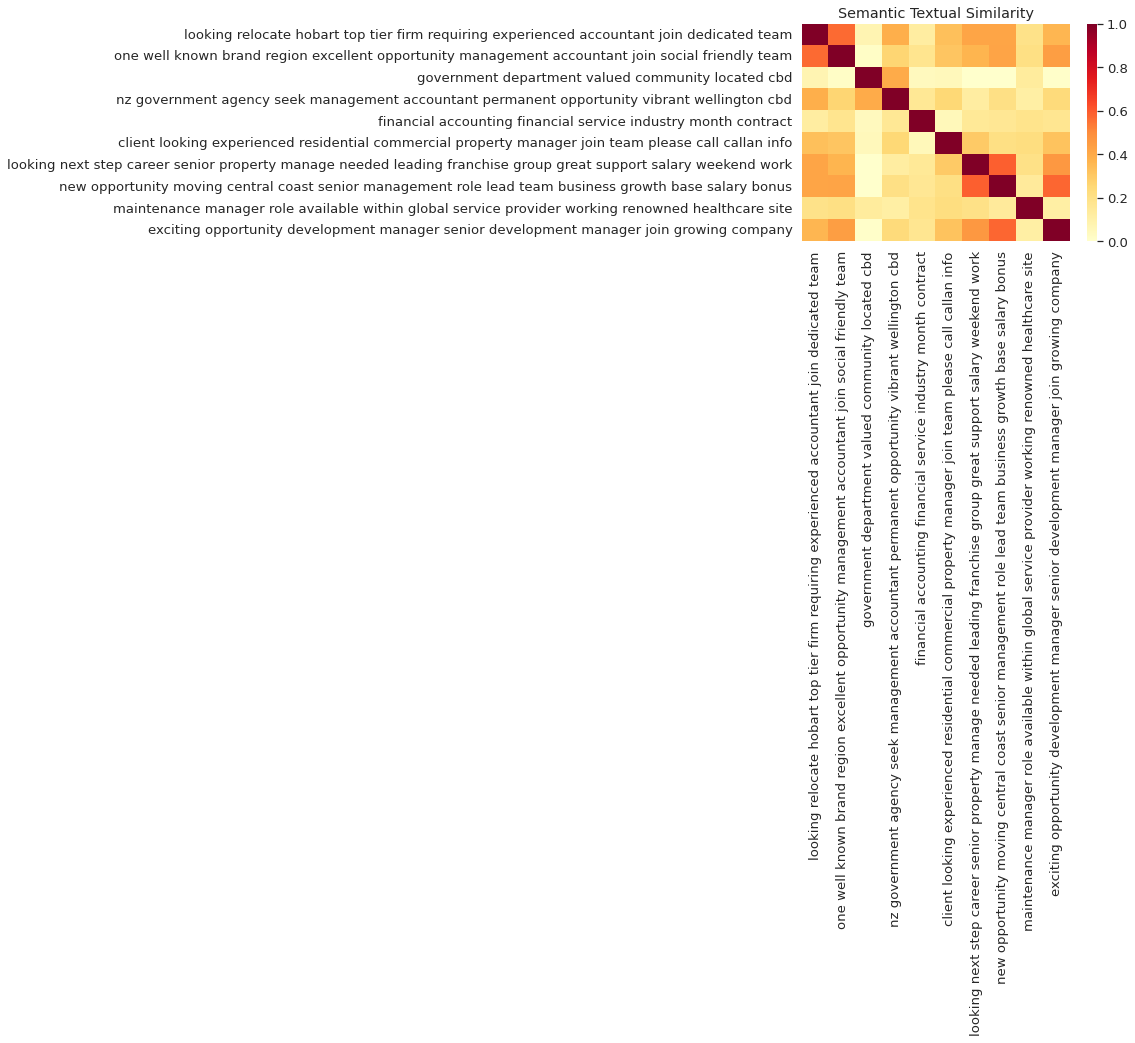

In [ ]:
run_and_plot(accounting_abstract[10:15] + BFS_abstract[20:25])

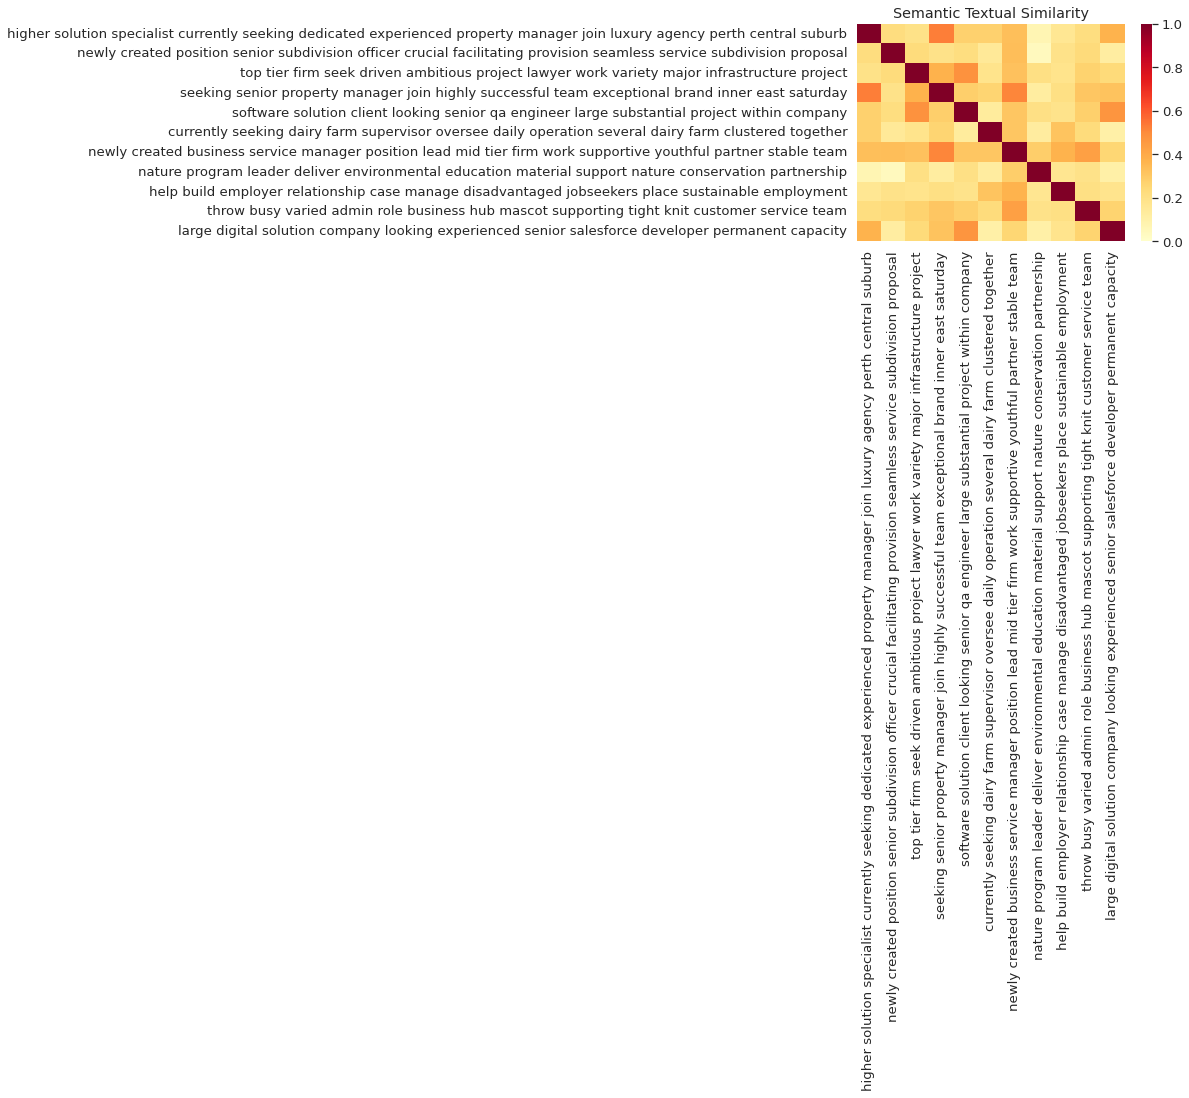

In [12]:

messages = [

    "higher solution specialist currently seeking dedicated experienced property manager join luxury agency perth central suburb",
    "newly created position senior subdivision officer crucial facilitating provision seamless service subdivision proposal",
    "top tier firm seek driven ambitious project lawyer work variety major infrastructure project",

    "seeking senior property manager join highly successful team exceptional brand inner east saturday",
    "software solution client looking senior qa engineer large substantial project within company",
    "currently seeking dairy farm supervisor oversee daily operation several dairy farm clustered together",
    "newly created business service manager position lead mid tier firm work supportive youthful partner stable team",
    "nature program leader deliver environmental education material support nature conservation partnership",
    "help build employer relationship case manage disadvantaged jobseekers place sustainable employment",

    "throw busy varied admin role business hub mascot supporting tight knit customer service team",
    "large digital solution company looking experienced senior salesforce developer permanent capacity",
]

run_and_plot(messages)


In [23]:
random_sample = df.sample(10)
msg_list = random_sample['abstract'].to_list()

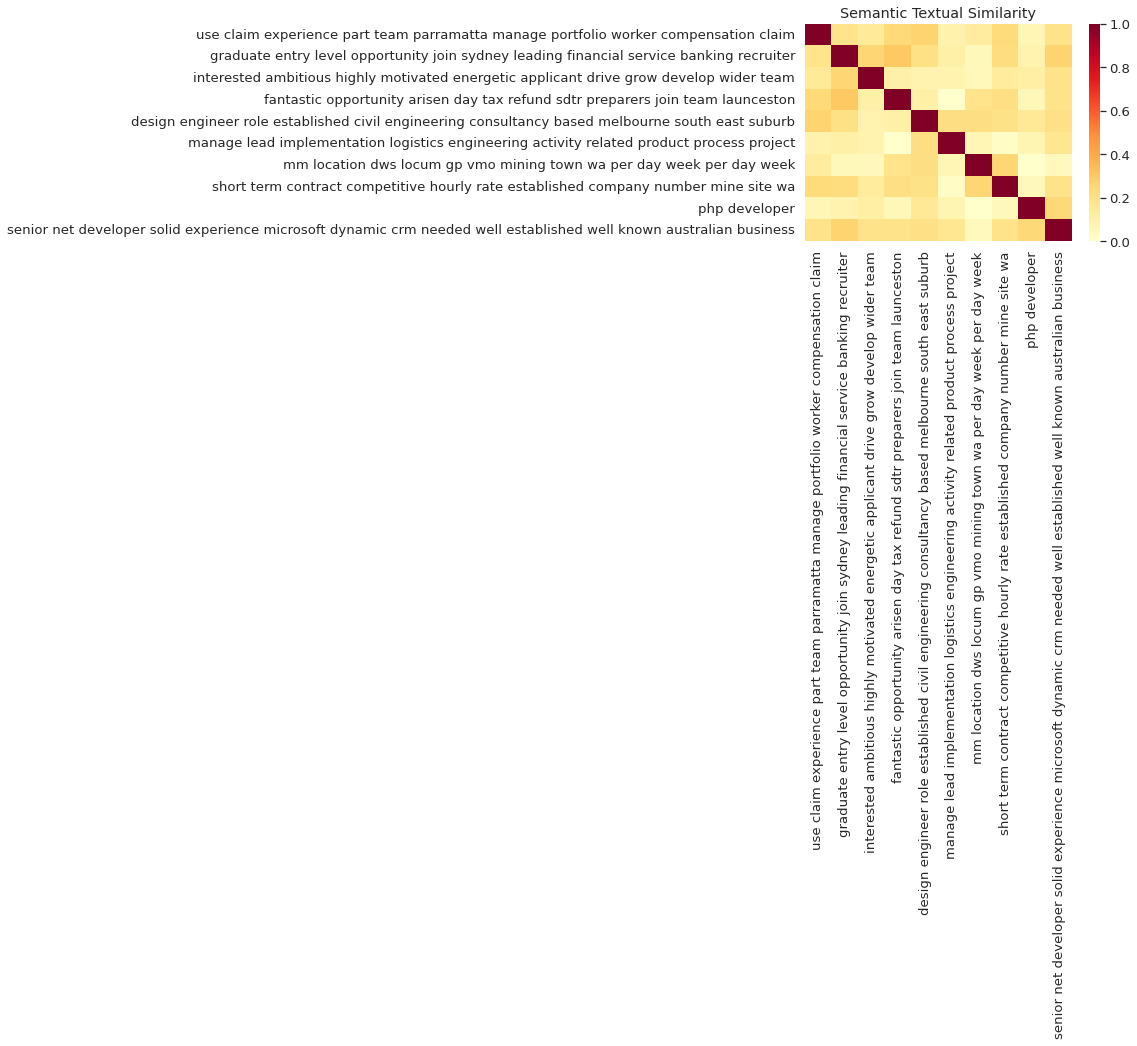

In [24]:
run_and_plot(msg_list)